<a href="https://colab.research.google.com/github/mbraddy/CAP4630-AI/blob/master/hw2/CAP4630_Braddy_HW2_Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

cifar_mnist = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(150, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model_goodfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model_goodfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
epochs = 5
history_under = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 142us/sample - loss: 2.1704 - acc: 0.1673 - val_loss: 2.1057 - val_acc: 0.1806
Epoch 2/5
50000/50000 [==============================] - 7s 136us/sample - loss: 2.0998 - acc: 0.1753 - val_loss: 2.0782 - val_acc: 0.1893
Epoch 3/5
50000/50000 [==============================] - 7s 130us/sample - loss: 2.0812 - acc: 0.1811 - val_loss: 2.0725 - val_acc: 0.1826
Epoch 4/5
50000/50000 [==============================] - 6s 130us/sample - loss: 2.0768 - acc: 0.1820 - val_loss: 2.0866 - val_acc: 0.1783
Epoch 5/5
50000/50000 [==============================] - 6s 125us/sample - loss: 2.0714 - acc: 0.1800 - val_loss: 2.0619 - val_acc: 0.1720


In [24]:
epochs = 20
history_over = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 451us/sample - loss: 1.8333 - acc: 0.3443 - val_loss: 2.0362 - val_acc: 0.3030
Epoch 2/20
50000/50000 [==============================] - 21s 411us/sample - loss: 1.6485 - acc: 0.4108 - val_loss: 1.7614 - val_acc: 0.3818
Epoch 3/20
50000/50000 [==============================] - 21s 416us/sample - loss: 1.5743 - acc: 0.4395 - val_loss: 1.8037 - val_acc: 0.3699
Epoch 4/20
50000/50000 [==============================] - 21s 416us/sample - loss: 1.5206 - acc: 0.4617 - val_loss: 1.6377 - val_acc: 0.4191
Epoch 5/20
50000/50000 [==============================] - 21s 426us/sample - loss: 1.4780 - acc: 0.4761 - val_loss: 1.4947 - val_acc: 0.4626
Epoch 6/20
50000/50000 [==============================] - 21s 427us/sample - loss: 1.4363 - acc: 0.4887 - val_loss: 1.4684 - val_acc: 0.4789
Epoch 7/20
50000/50000 [==============================] - 22s 436us/sample - loss: 1.4077 - acc: 0.4969 

In [27]:
epochs = 15
history_good = model_goodfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 22s 448us/sample - loss: 1.8656 - acc: 0.3332 - val_loss: 1.7112 - val_acc: 0.3851
Epoch 2/15
50000/50000 [==============================] - 22s 442us/sample - loss: 1.7020 - acc: 0.3935 - val_loss: 1.6066 - val_acc: 0.4326
Epoch 3/15
50000/50000 [==============================] - 22s 437us/sample - loss: 1.6284 - acc: 0.4201 - val_loss: 1.5498 - val_acc: 0.4453
Epoch 4/15
50000/50000 [==============================] - 20s 405us/sample - loss: 1.5866 - acc: 0.4340 - val_loss: 1.5018 - val_acc: 0.4612
Epoch 5/15
50000/50000 [==============================] - 18s 356us/sample - loss: 1.5587 - acc: 0.4440 - val_loss: 1.4906 - val_acc: 0.4746
Epoch 6/15
50000/50000 [==============================] - 17s 340us/sample - loss: 1.5349 - acc: 0.4514 - val_loss: 1.5469 - val_acc: 0.4491
Epoch 7/15
50000/50000 [==============================] - 17s 348us/sample - loss: 1.5134 - acc: 0.4613 

Plots - Underfit

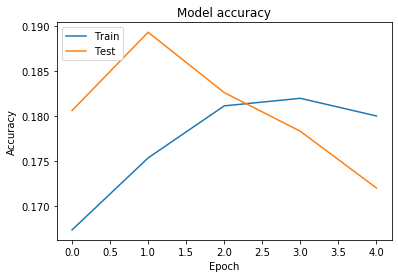

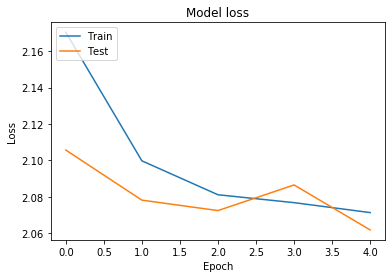

In [28]:
# Plot training & validation accuracy values
plt.plot(history_under.history['acc'])
plt.plot(history_under.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_under.history['loss'])
plt.plot(history_under.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plots - Overfit

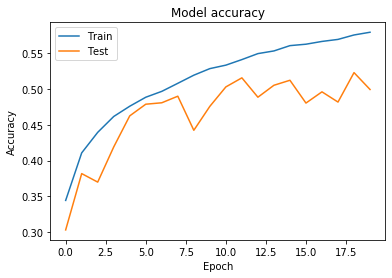

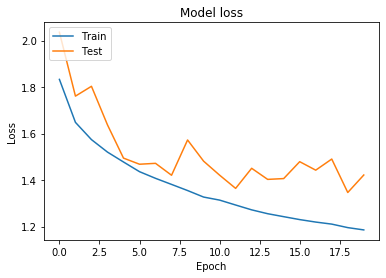

In [29]:
# Plot training & validation accuracy values
plt.plot(history_over.history['acc'])
plt.plot(history_over.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_over.history['loss'])
plt.plot(history_over.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plots - Goodfit

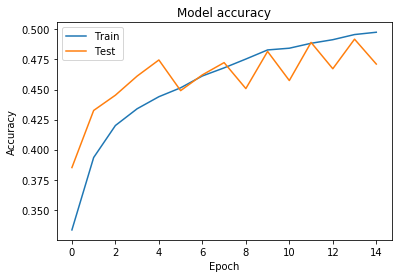

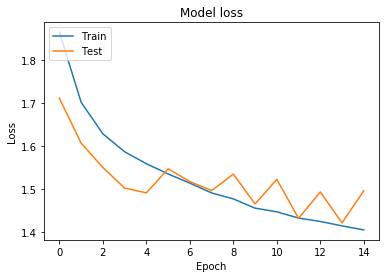

In [30]:
# Plot training & validation accuracy values
plt.plot(history_good.history['acc'])
plt.plot(history_good.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_good.history['loss'])
plt.plot(history_good.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()